In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('../../')
from modules.data_import import *
from modules.basics import *

In [2]:
run_name = '11-24-2021'

# Train classifier

### Data

In [3]:
PATH = Path('../../../MC')

In [4]:
train_fy = FoldYielder(PATH/'train_1.hdf5', input_pipe=PATH/'input_pipe_1.pkl')

### Training

In [5]:
bs = 1024
objective = 'classification'
cat_embedder = CatEmbedder.from_fy(train_fy)
# width=len(train_fy.cont_feats)+np.sum(cat_embedder.emb_szs)

# body = partial(FullyConnected, act='swish',width=width,depth=6,dense=True, do=0.05)
body = partial(FullyConnected, act='swish',width=25,depth=3,dense=True, do=0)
opt_args = {'opt':'adam', 'eps':1e-08}

n_out = 1
model_builder = ModelBuilder(objective, cont_feats=train_fy.cont_feats, n_out=n_out, cat_embedder=cat_embedder,
                             body=body, opt_args=opt_args)
Model(model_builder)

Inputs:
22 Continuous: ['Higgsbb_cand_pt', 'Zjet_cand_pt', 'leading_Hbb_pt', 'trailing_Hbb_pt', 'leading_jet_pt', 'trailing_jet_pt', 'Higgsbb_cand_mass', 'HiggsZZ_cand_mass', 'Zlep_cand_mass', 'Zjet_cand_mass', 'Zlep_cand_pt', 'dR_l1j1', 'dR_l1j2', 'dR_l1b1', 'dR_l1b2', 'dR_l2j1', 'dR_l2j2', 'dR_l2b1', 'dR_l2b2', 'dR_j1j2', 'dR_b1b2', 'res_mass']
                   
0  Categorical: []
                   
0  Matrix elements: []
                   

Model:
<bound method Module.parameters of Sequential(
  (0): CatEmbHead()
  (1): FullyConnected(
    (layers): ModuleList(
      (0): Sequential(
        (0): Linear(in_features=22, out_features=25, bias=True)
        (1): Swish()
      )
      (1): Sequential(
        (0): Linear(in_features=47, out_features=25, bias=True)
        (1): Swish()
      )
      (2): Sequential(
        (0): Linear(in_features=72, out_features=25, bias=True)
        (1): Swish()
      )
    )
  )
  (2): ClassRegMulti(
    (dense): Linear(in_features=25, out_featu

LR finder took 2.886s 


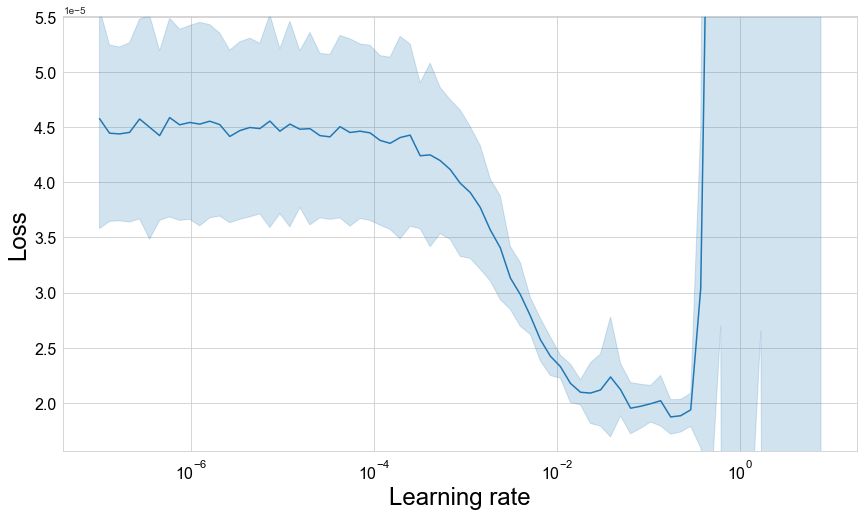

In [6]:
lr_finder = fold_lr_find(train_fy, model_builder, bs, lr_bounds=[1e-7,1e1])

In [7]:
n_models = 10
patience = 5
n_epochs = 15

# callback_partials = [partial(OneCycle, lengths=(45, 90), lr_range=[2e-5, 2e-3], mom_range=(0.85, 0.95), interp='cosine')]
# eval_metrics = {}
cb_partials = [partial(OneCycle, lengths=(45, 90), lr_range=[1e-3, 1e-2], mom_range=(0.85, 0.95), interp='cosine')]
metric_partials = [partial(AMS, n_total=250000, br=10, wgt_name='gen_orig_weight', main_metric=False)]

Training model 1 / 10, Valid Index = 0, Train indices= [1, 2, 3, 4, 5, 6, 7, 8, 9]


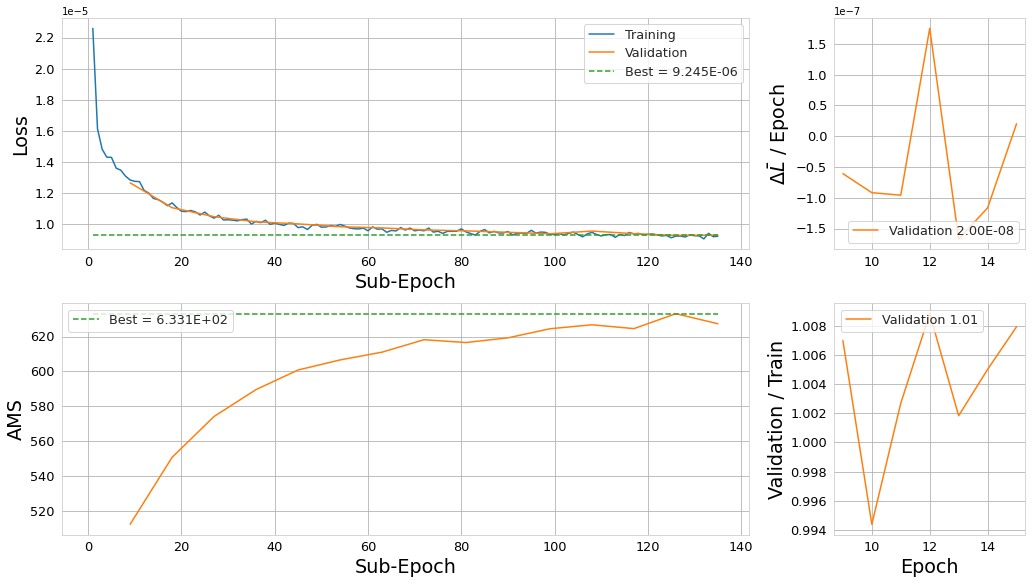

Loading best model with metric value 9.245E-06
Model took 81.413s

Scores are: {'loss': 9.245186447515152e-06, 'AMS': 633.0847790723037}
Training model 2 / 10, Valid Index = 1, Train indices= [0, 2, 3, 4, 5, 6, 7, 8, 9]


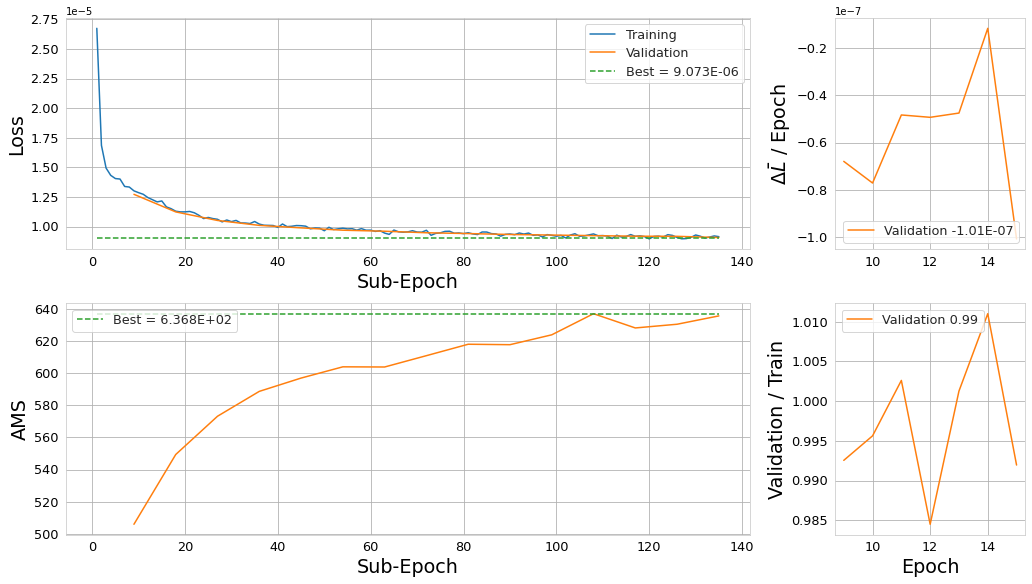

Loading best model with metric value 9.073E-06
Model took 78.610s

Scores are: {'loss': 9.07284083950799e-06, 'AMS': 635.4659285395898}
Training model 3 / 10, Valid Index = 2, Train indices= [0, 1, 3, 4, 5, 6, 7, 8, 9]


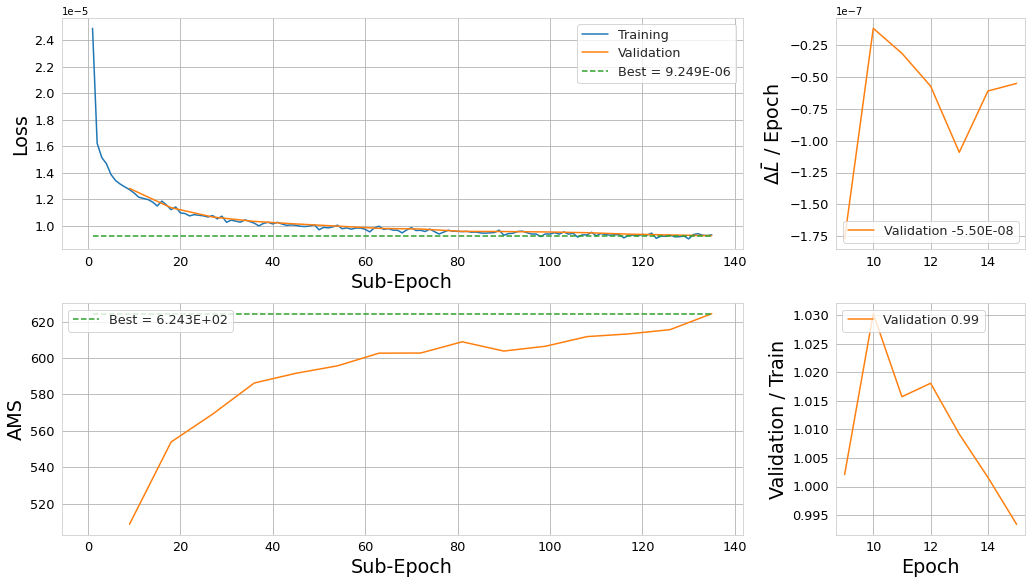

Loading best model with metric value 9.249E-06
Model took 78.179s

Scores are: {'loss': 9.249108188669197e-06, 'AMS': 624.3478738556353}
Training model 4 / 10, Valid Index = 3, Train indices= [0, 1, 2, 4, 5, 6, 7, 8, 9]


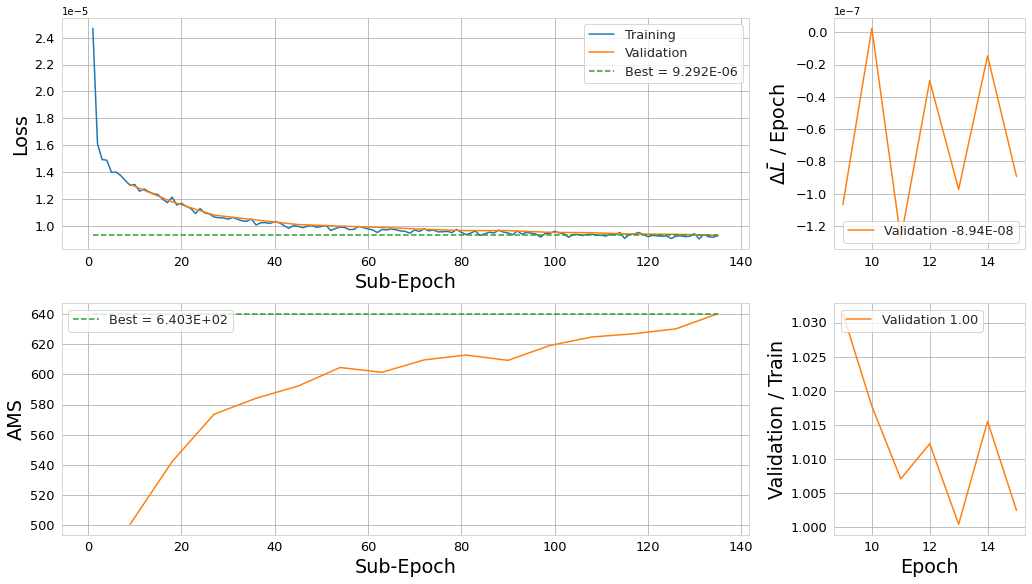

Loading best model with metric value 9.292E-06
Model took 91.260s

Scores are: {'loss': 9.292111826653127e-06, 'AMS': 640.3306775711213}
Training model 5 / 10, Valid Index = 4, Train indices= [0, 1, 2, 3, 5, 6, 7, 8, 9]


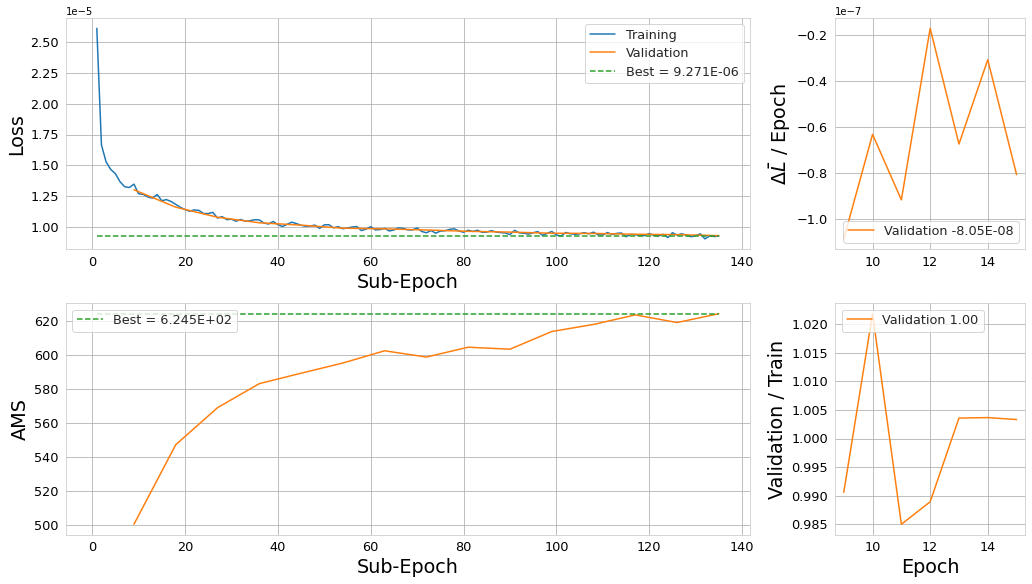

Loading best model with metric value 9.271E-06
Model took 94.651s

Scores are: {'loss': 9.271000635635573e-06, 'AMS': 624.5140310854468}
Training model 6 / 10, Valid Index = 5, Train indices= [0, 1, 2, 3, 4, 6, 7, 8, 9]


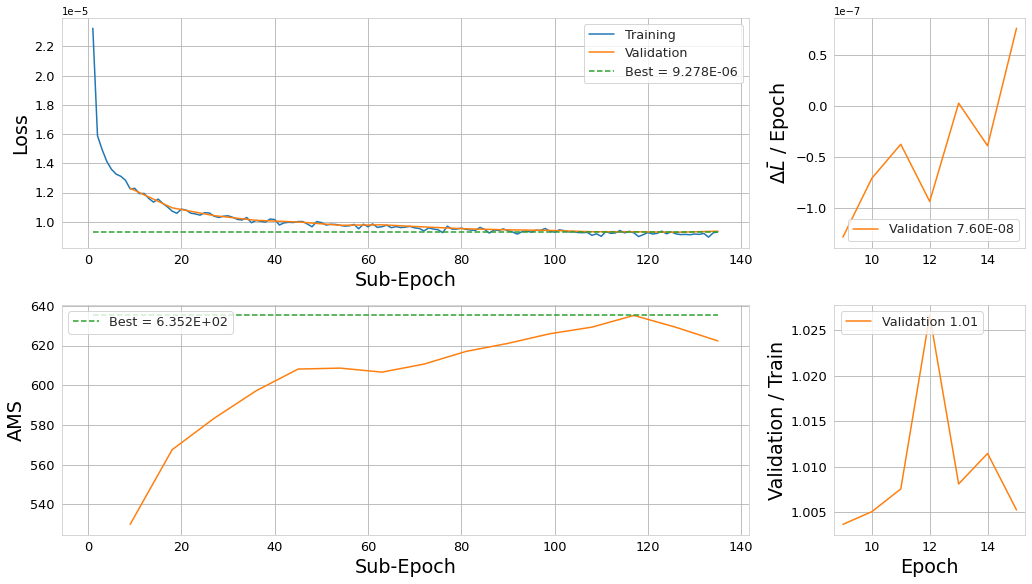

Loading best model with metric value 9.278E-06
Model took 96.534s

Scores are: {'loss': 9.277958270104136e-06, 'AMS': 629.2084901846802}
Training model 7 / 10, Valid Index = 6, Train indices= [0, 1, 2, 3, 4, 5, 7, 8, 9]


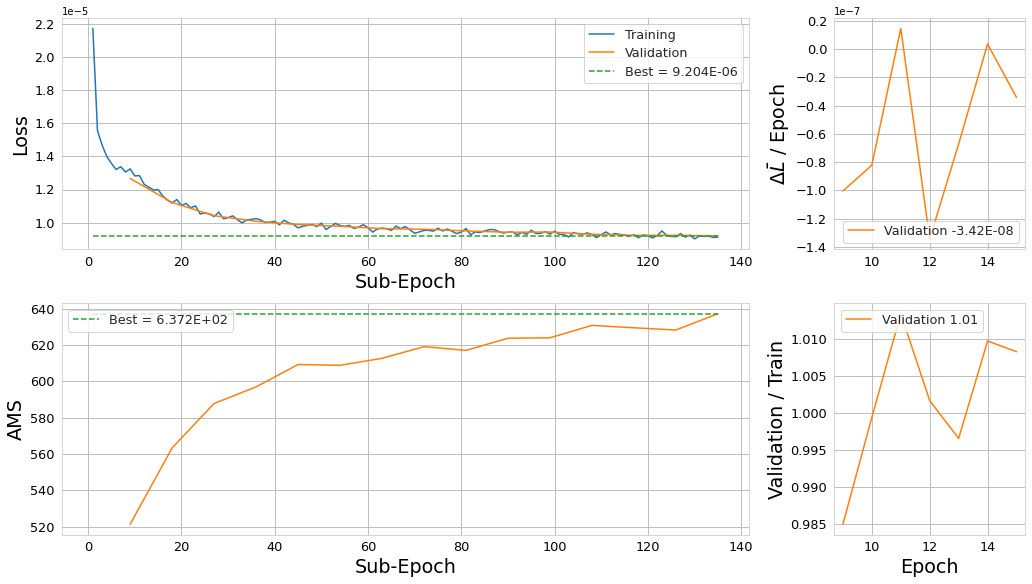

Loading best model with metric value 9.204E-06
Model took 99.472s

Scores are: {'loss': 9.203986337524839e-06, 'AMS': 637.1969270353079}
Training model 8 / 10, Valid Index = 7, Train indices= [0, 1, 2, 3, 4, 5, 6, 8, 9]


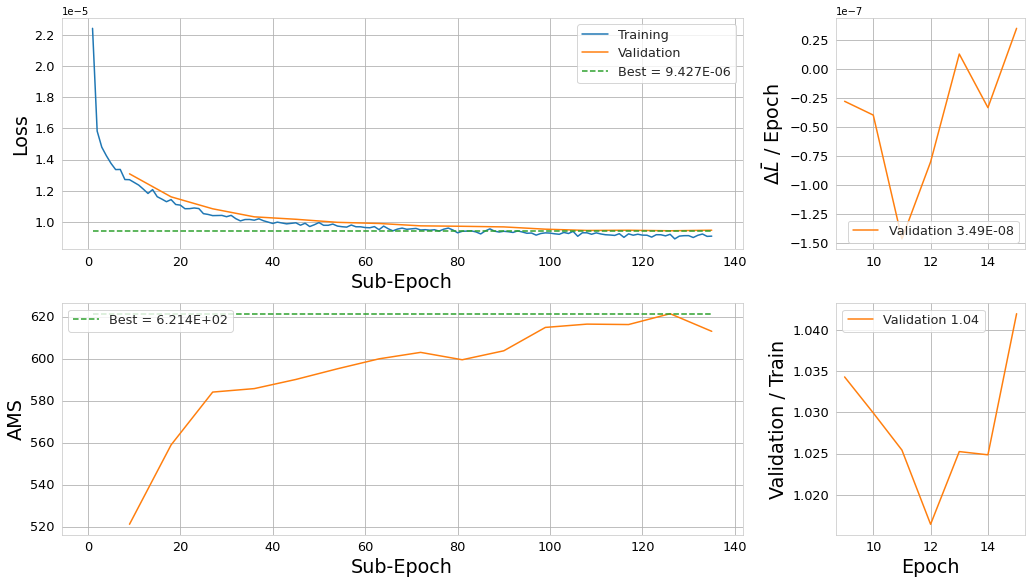

Loading best model with metric value 9.427E-06
Model took 94.993s

Scores are: {'loss': 9.427153599972371e-06, 'AMS': 621.3699525713438}
Training model 9 / 10, Valid Index = 8, Train indices= [0, 1, 2, 3, 4, 5, 6, 7, 9]


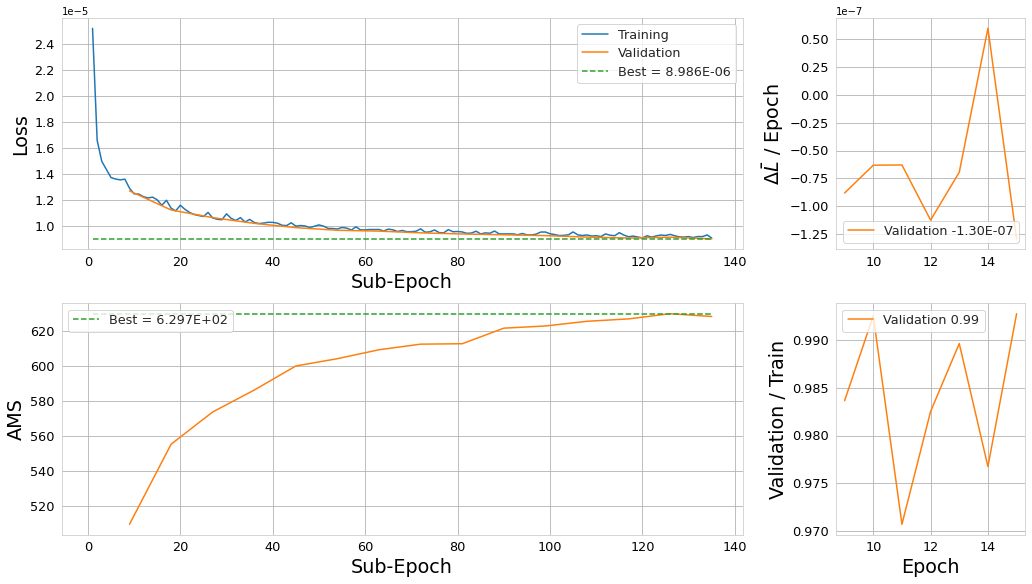

Loading best model with metric value 8.986E-06
Model took 100.254s

Scores are: {'loss': 8.986155080492608e-06, 'AMS': 628.0821187106477}
Training model 10 / 10, Valid Index = 9, Train indices= [0, 1, 2, 3, 4, 5, 6, 7, 8]


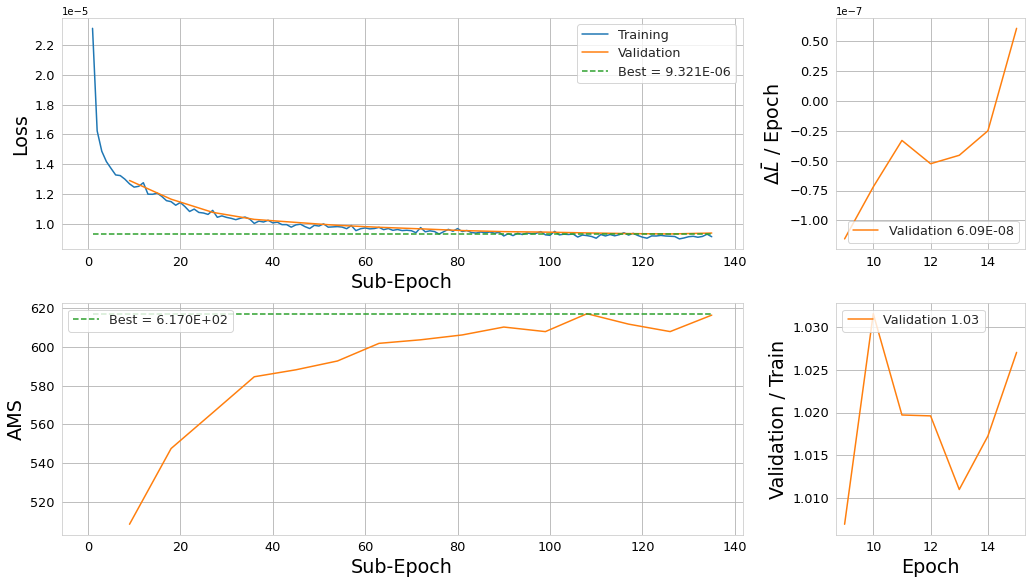

Loading best model with metric value 9.321E-06
Model took 107.111s

Scores are: {'loss': 9.321452125732321e-06, 'AMS': 607.8346069615214}

______________________________________
Training finished
Cross-validation took 923.364s 


<Figure size 1024x576 with 0 Axes>

<Figure size 1024x576 with 0 Axes>

<Figure size 1024x576 with 0 Axes>

<Figure size 1024x576 with 0 Axes>

<Figure size 1024x576 with 0 Axes>

<Figure size 1024x576 with 0 Axes>

<Figure size 1024x576 with 0 Axes>

<Figure size 1024x576 with 0 Axes>

<Figure size 1024x576 with 0 Axes>

<Figure size 1024x576 with 0 Axes>

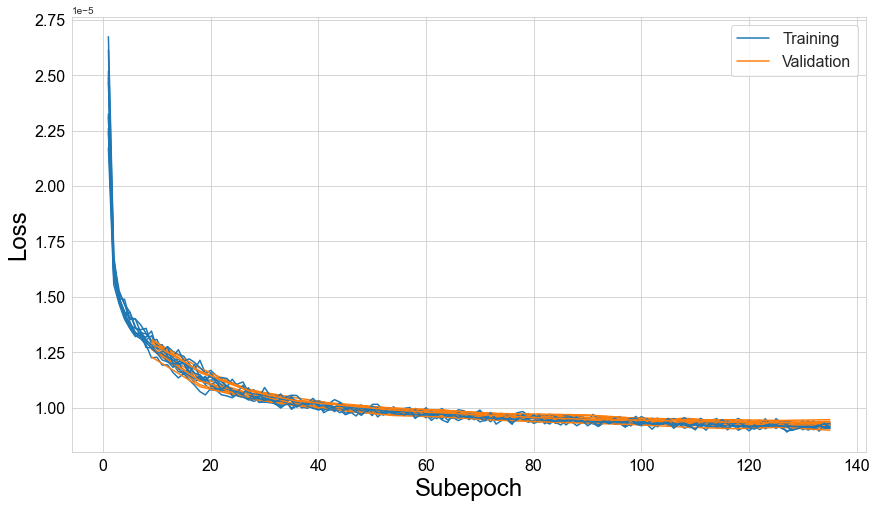

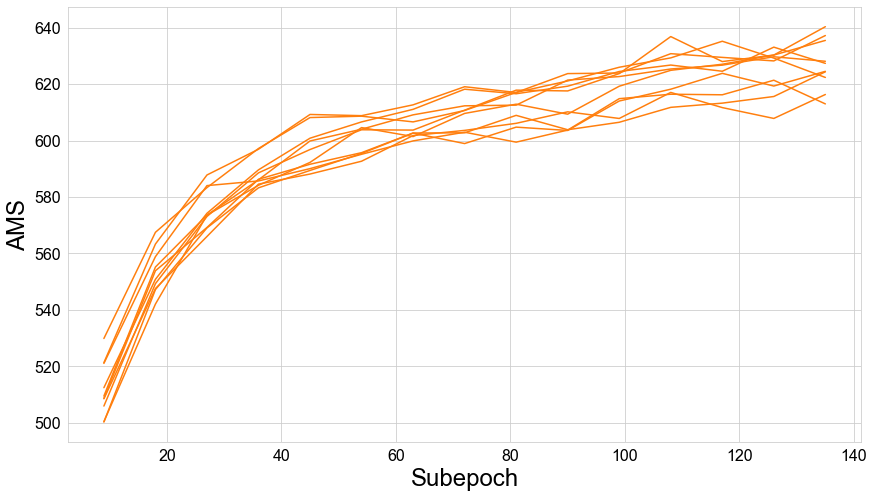

Mean loss = 9.23e-06±4e-08
Mean AMS = 628±3
______________________________________



In [9]:
# results, histories, cycle_losses = fold_train_ensemble(train_fy, n_models, live_fdbk_first_only=False,
#                                                        model_builder=model_builder,
#                                                        bs=bs,
#                                                        callback_partials=callback_partials,
#                                                        eval_metrics=eval_metrics,
#                                                        max_epochs=max_epochs, patience=patience,
#                                                        savepath=Path('train_weights_1'))

from lumin.nn.training.train import train_models

results, histories, cycle_losses = train_models(train_fy,  # Training data
                                                n_models,  # Number of models to train
                                                model_builder=model_builder,  # How to build models, losses, and optimisers
                                                bs=bs,  # Batch size
                                                cb_partials=cb_partials,  # List of uninitialised callbacks
                                                metric_partials=metric_partials,  # Pass our evaluation metrics
                                                n_epochs=n_epochs,  # Maximum number of epochs to train
                                                patience=patience)  # If not None, stop training if validation loss doesn't improve after set number of cycles (automatic save best)

## Ensemble loading
We can now build an ensemble from the trained models, however rather than simply treating them all equally, we can weight them according to some metric (e.g. AMS, reciprocal of loss).

In [10]:
with open('train_weights/results_file.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [11]:
# ensemble = Ensemble.from_results(results, n_models, model_builder, metric='loss', location=Path('train_weights_1'))
ensemble = Ensemble.from_results(results, n_models, model_builder, metric='loss')
ensemble.add_input_pipe(train_fy.input_pipe)

Choosing ensemble by loss


Model 0 is 8 with loss = 8.986155080492608e-06
Model 1 is 1 with loss = 9.07284083950799e-06
Model 2 is 6 with loss = 9.203986337524839e-06
Model 3 is 0 with loss = 9.245186447515152e-06
Model 4 is 2 with loss = 9.249108188669197e-06
Model 5 is 4 with loss = 9.271000635635573e-06
Model 6 is 5 with loss = 9.277958270104136e-06
Model 7 is 3 with loss = 9.292111826653127e-06
Model 8 is 9 with loss = 9.321452125732321e-06
Model 9 is 7 with loss = 9.427153599972371e-06


In [12]:
name = f'weights/selected_set_1_{run_name}'

In [14]:
ensemble.save(name, feats=train_fy.cont_feats+train_fy.cat_feats, overwrite=True)

# Interpretation

Top ten most important features:
              Feature  Importance  Uncertainty
0           res_mass    4.220058     0.057191
1       Zlep_cand_pt    1.010938     0.017678
2     Zlep_cand_mass    0.713564     0.014914
3     leading_Hbb_pt    0.586854     0.013661
4  HiggsZZ_cand_mass    0.581931     0.013752
5    trailing_Hbb_pt    0.415653     0.010461
6            dR_l1b1    0.302270     0.008363
7  Higgsbb_cand_mass    0.257537     0.007404
8            dR_b1b2    0.205573     0.006371
9    Higgsbb_cand_pt    0.174544     0.005892


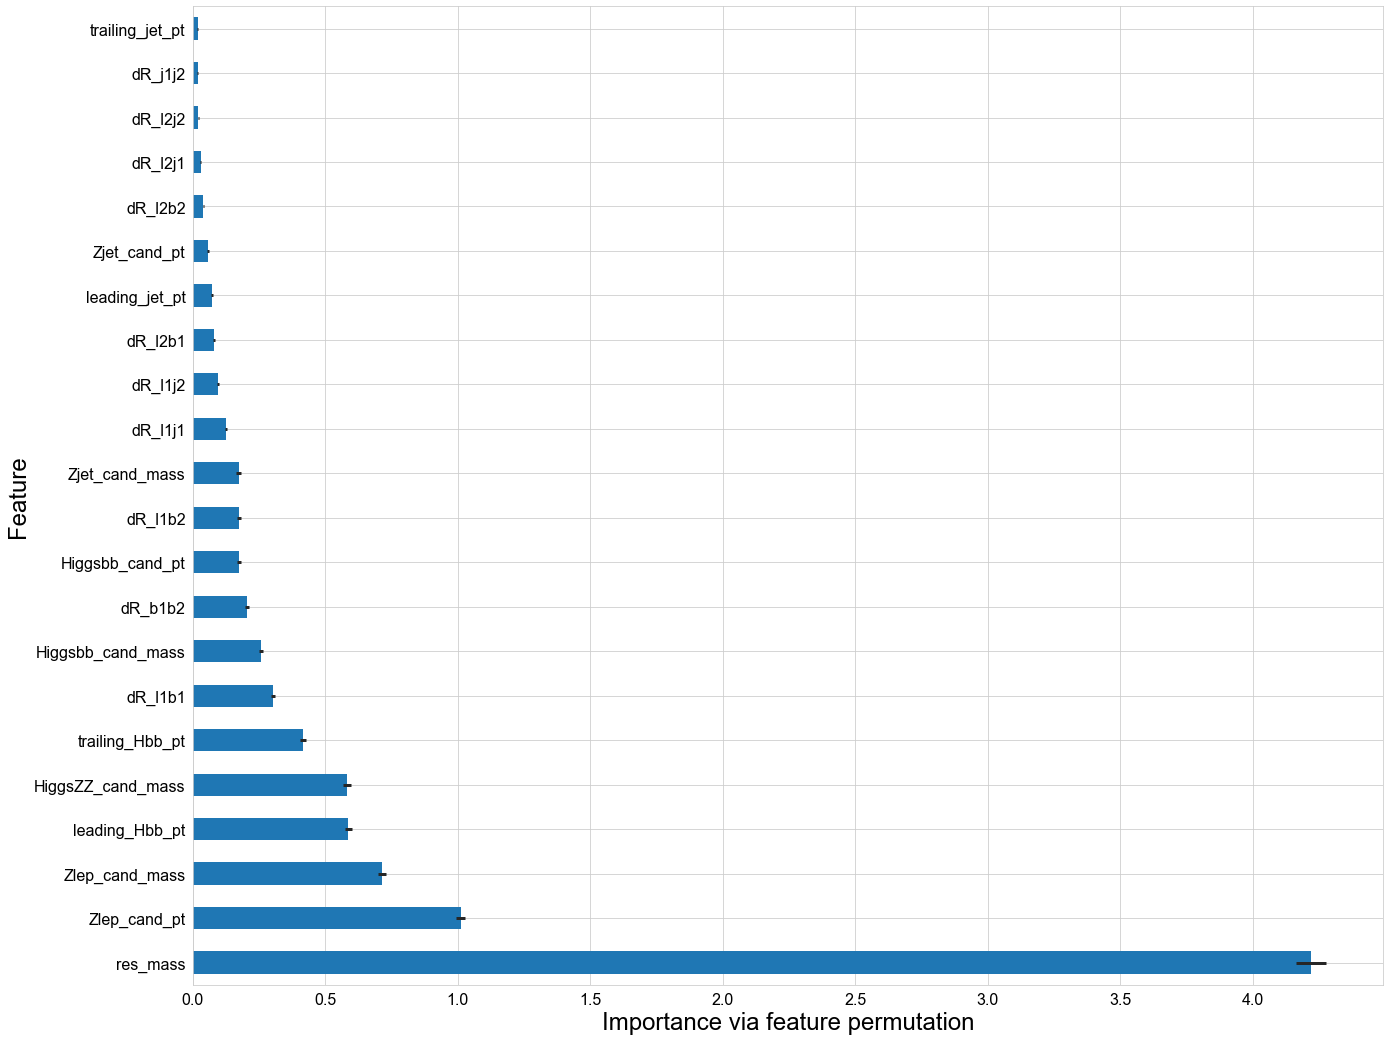

In [14]:
_ = ensemble.get_feat_importance(train_fy)

In [15]:
ensemble[0][1].head.plot_embeds()

In [16]:
m = ensemble[0][1]

In [17]:
train_df = train_fy.get_df(inc_inputs=True, nan_to_num=True)

753939 datapoints loaded


In [18]:
def preprocess_mass(m):
    idx = train_fy.cont_feats.index('res_mass')
    m -= train_fy.input_pipe[0].mean_[idx]
    m /= train_fy.input_pipe[0].scale_[idx]
    return m

In [19]:
masses = train_df.res_mass.unique()

In [20]:
masses

array([-0.95157874, -0.9379987 , -0.89725864, -0.8293586 , -0.76145846,
       -0.69355845, -0.62565833, -0.5577583 , -0.48985815, -0.42195806,
       -0.28615788, -0.21825778,  0.05334257,  0.392843  ,  0.7323435 ,
        1.071844  ,  1.4113443 ,  2.0903451 ,  2.769346  ], dtype=float32)

In [21]:
train_feats = train_fy.cont_feats+train_fy.cat_feats

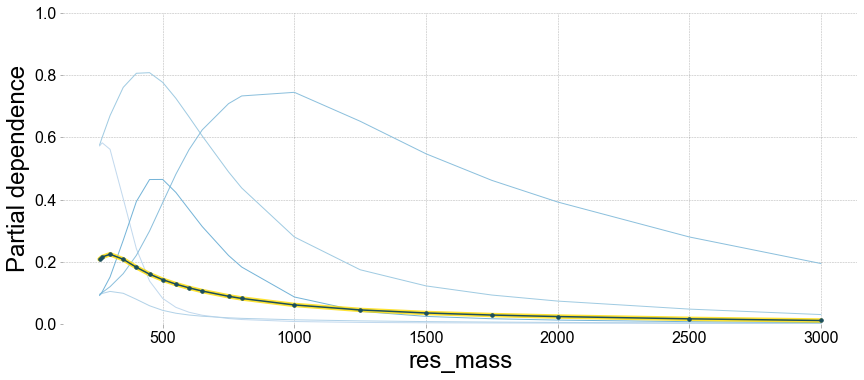

In [22]:
plot_1d_partial_dependence(m, train_df[train_df.gen_target==0], 'res_mass', train_feats=train_feats, y_lim=[0,1],
                           input_pipe=train_fy.input_pipe, wgt_name='gen_weight', sample_sz=int(len(train_df[train_df.gen_target==0])/2),
                           pdp_isolate_kargs={'cust_grid_points':masses}, n_clusters=5)

In [23]:
def lookup_mass(m):
    idx = train_feats.index('res_mass')
    m *= train_fy.input_pipe[0].scale_[idx]
    m += train_fy.input_pipe[0].mean_[idx]
    return int(round(m))

Mass 260, N events 8716, weight_sum 0.9999998807907104


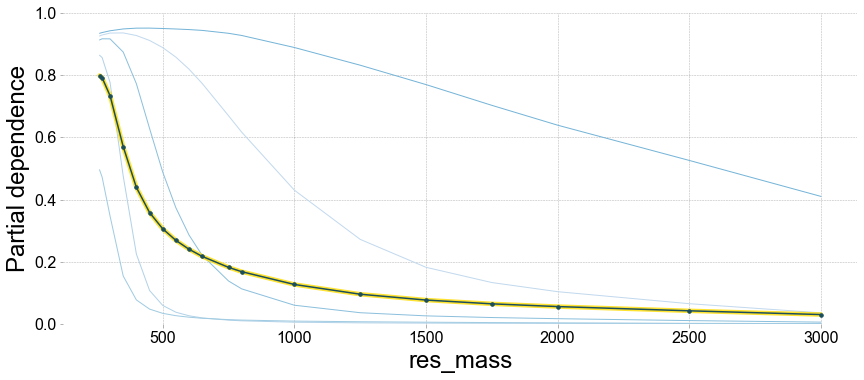

Mass 270, N events 9355, weight_sum 1.000000238418579


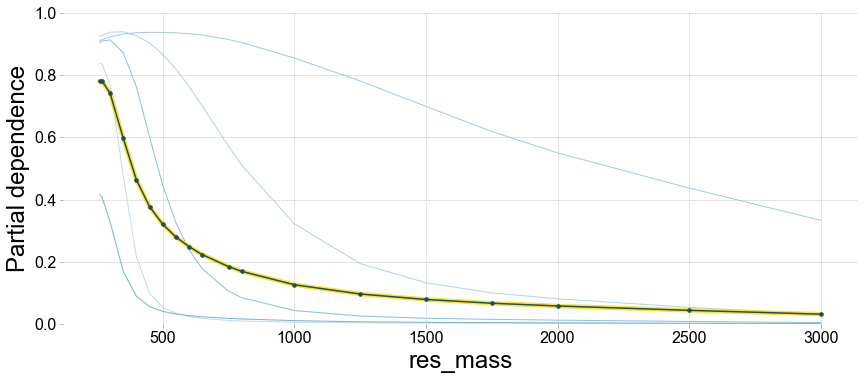

Mass 300, N events 10928, weight_sum 0.9999998807907104


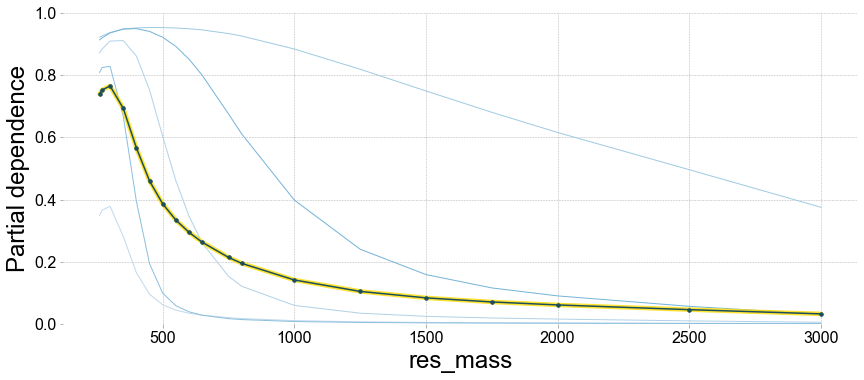

Mass 350, N events 13149, weight_sum 0.9999998807907104


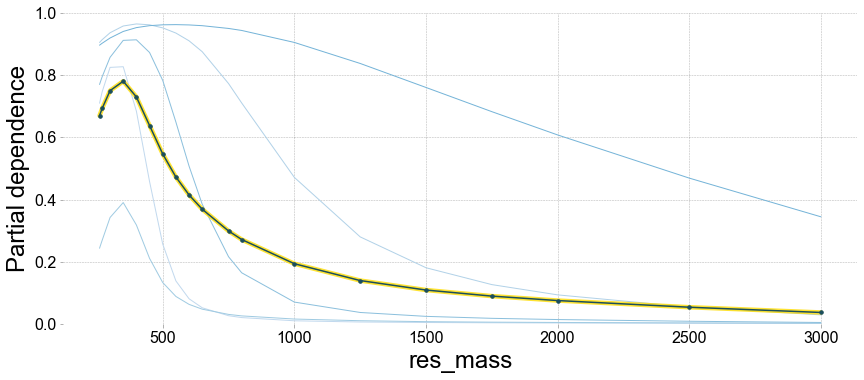

Mass 400, N events 14753, weight_sum 0.9999999403953552


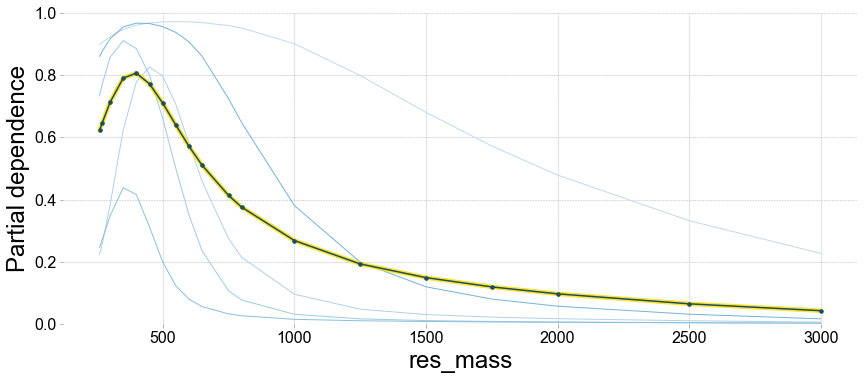

Mass 450, N events 16017, weight_sum 0.9999999403953552


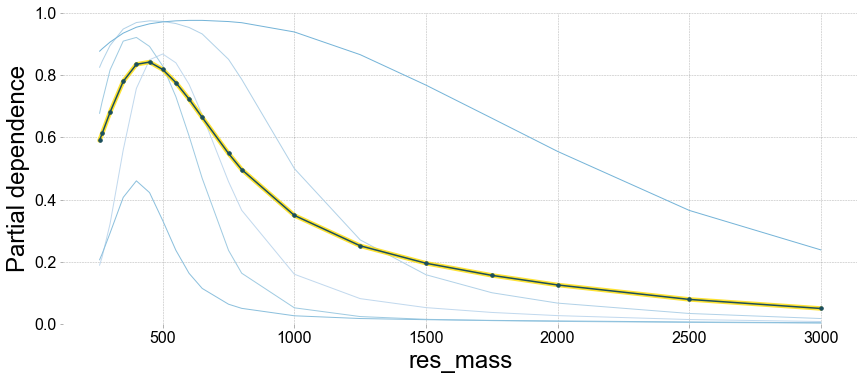

Mass 500, N events 16721, weight_sum 1.0000001192092896


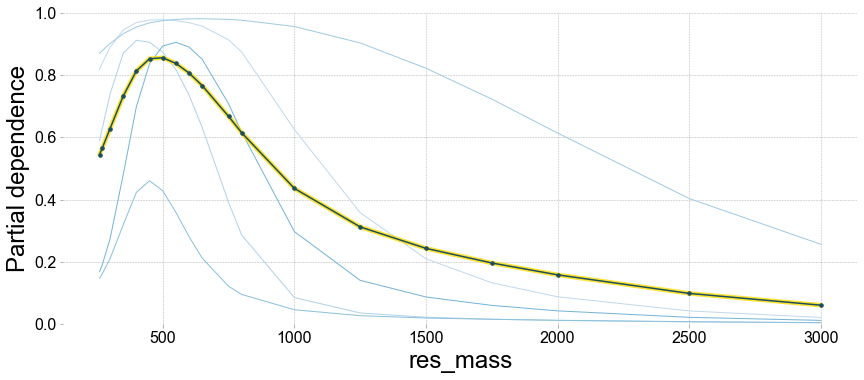

Mass 550, N events 17601, weight_sum 1.000000238418579


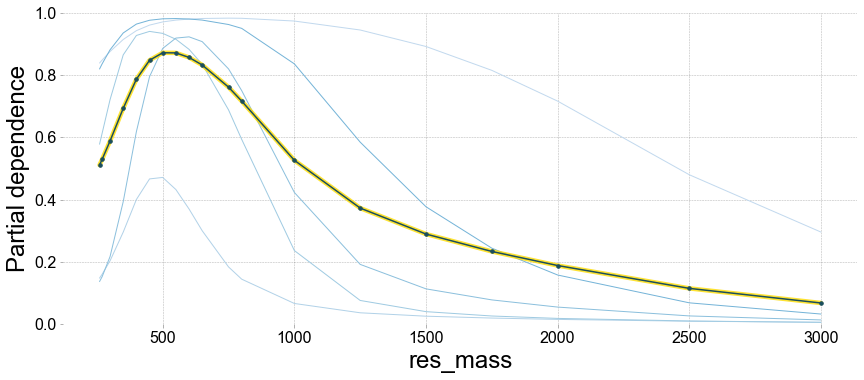

Mass 600, N events 17827, weight_sum 0.9999998807907104


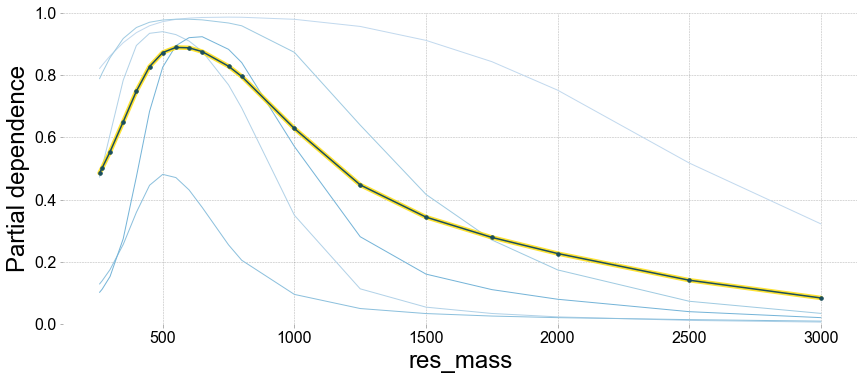

Mass 650, N events 18140, weight_sum 1.0


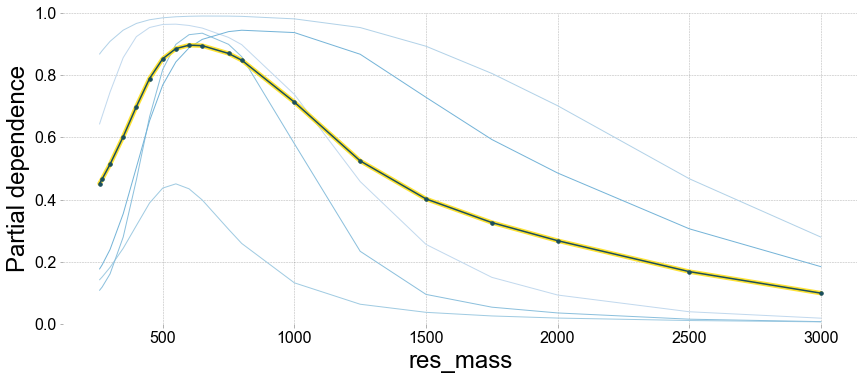

Mass 750, N events 18404, weight_sum 1.0000001192092896


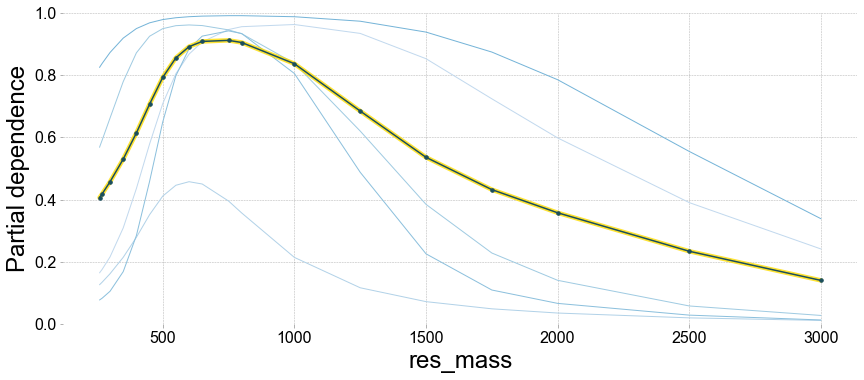

Mass 800, N events 18343, weight_sum 1.0


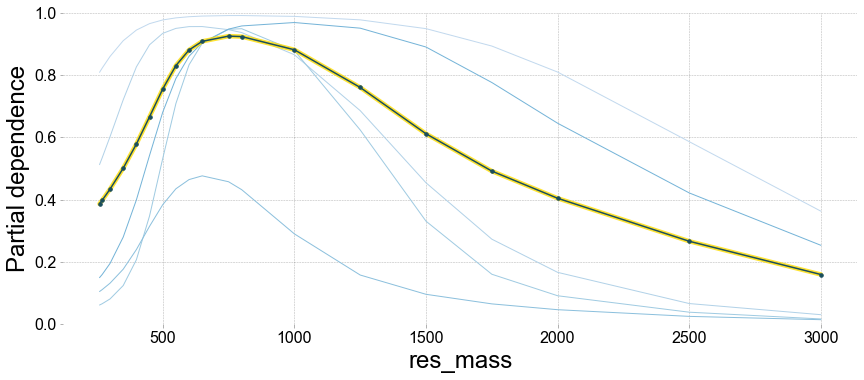

Mass 1000, N events 18123, weight_sum 0.9999997615814209


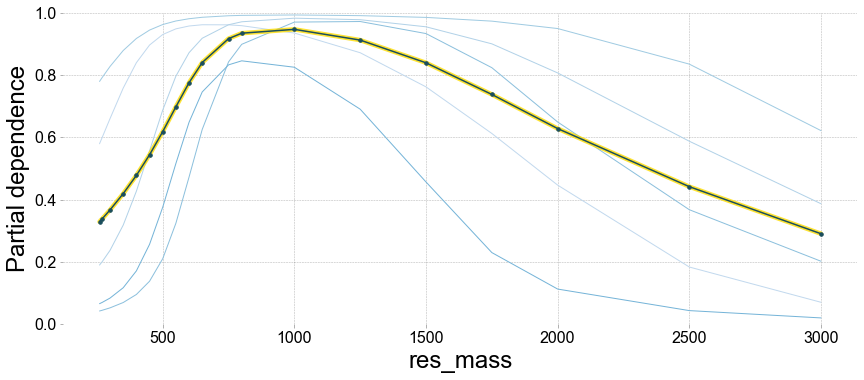

Mass 1250, N events 15283, weight_sum 0.9999998211860657


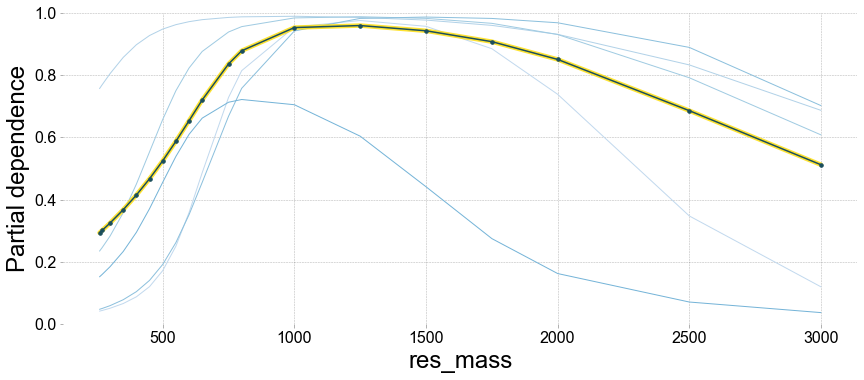

Mass 1500, N events 13711, weight_sum 1.0


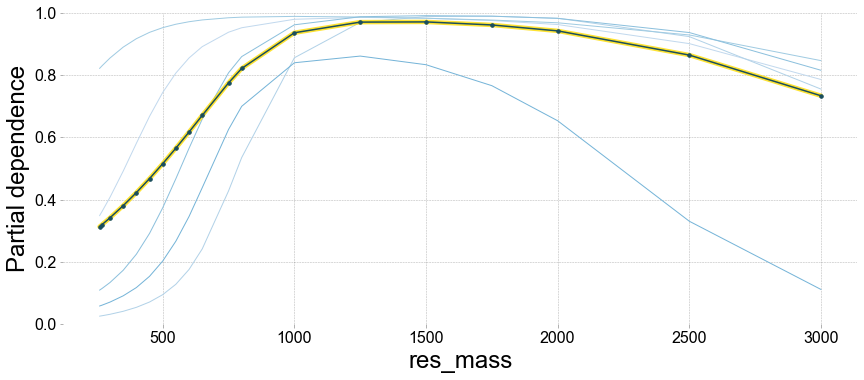

Mass 1750, N events 13353, weight_sum 0.9999998807907104


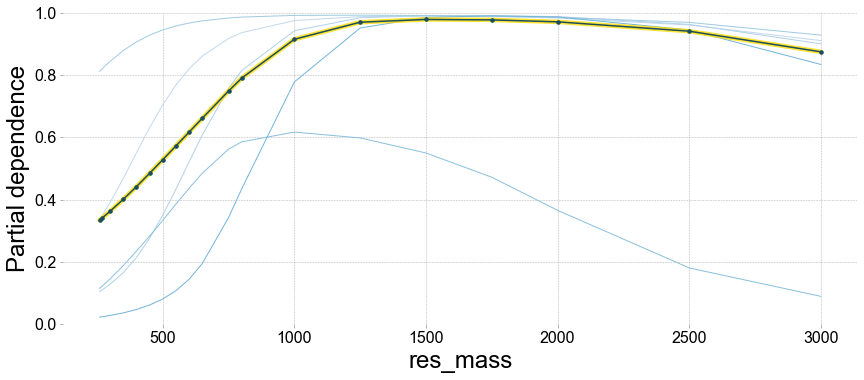

Mass 2000, N events 12543, weight_sum 1.0


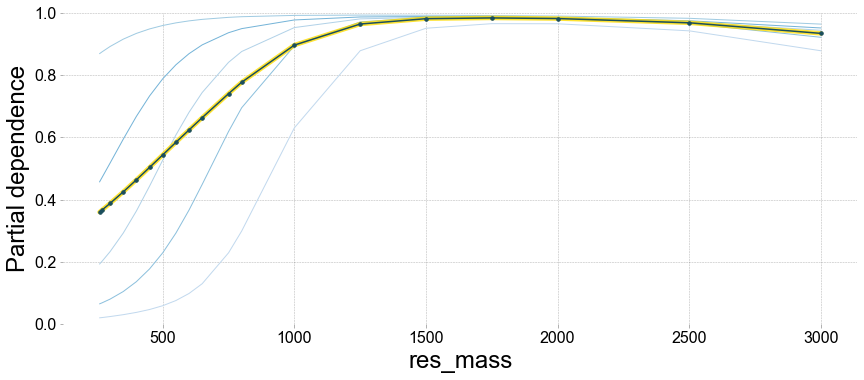

Mass 2500, N events 10689, weight_sum 1.0000001192092896


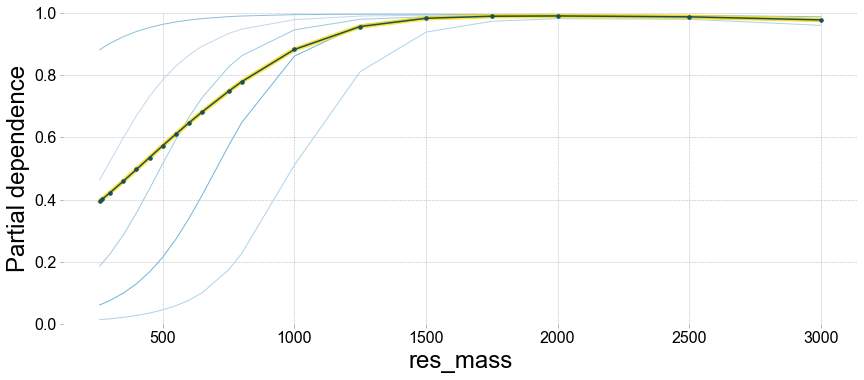

Mass 3000, N events 4807, weight_sum 1.0


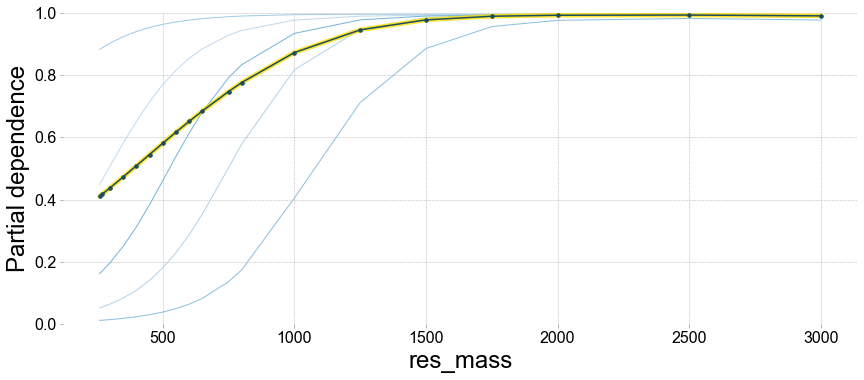

In [24]:
for mass in sorted(train_df.res_mass.unique()):
    df = train_df[(train_df.gen_target==1)&(train_df.res_mass==mass)]
    print(f'Mass {lookup_mass(mass)}, N events {len(df)}, weight_sum {df.gen_weight.sum()}')
    plot_1d_partial_dependence(m, df, 'res_mass', train_feats=train_feats, n_clusters=5, y_lim=[0,1],
                               input_pipe=train_fy.input_pipe, wgt_name='gen_weight',
                               pdp_isolate_kargs={'cust_grid_points':masses})